In [179]:
# Import the required modules
import pandas as pd # type: ignore
pd.set_option('display.max_columns', None)
import numpy as np # type: ignore


# visualization
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Machine Learning
from sklearn.model_selection import train_test_split # type: ignore

# Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet # type: ignore
from sklearn.tree import DecisionTreeRegressor # type: ignore
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor # type: ignore

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # type: ignore

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder # type: ignore
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn.impute import SimpleImputer # type: ignore

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv("cocaine_listing_clean.csv")
print(df.shape)
df.head()


(1504, 65)


,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,vendor_name,successful_transactions,rating,ships_from,ships_to,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,ships_from_FR,ships_to_GB,ships_from_GB,ships_to_CA,ships_from_CA,ships_to_DE,ships_from_DE,ships_to_AU,ships_from_AU,ships_to_EU,ships_from_EU,ships_to_ES,ships_from_ES,ships_to_N. America,ships_from_N. America,ships_to_BE,ships_from_BE,ships_to_WW,ships_from_WW,ships_to_SI,ships_from_SI,ships_to_IT,ships_from_IT,ships_to_DK,ships_from_DK,ships_to_S. America,ships_from_S. America,ships_to_CH,ships_from_CH,ships_to_BR,ships_from_BR,ships_to_CZ,ships_from_CZ,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR,usd_price,usd_price_per_gram,product_title_sentiment
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,Mister-Molly,90,4.63,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2225.964410,2225.964410,0.000000
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,Mister-Molly,90,4.63,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4448.473695,2224.236847,0.000000
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.03298,0.037056,1,0ldamsterdamm,620,4.94,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1424.375364,2848.750727,0.200000
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.04120,0.046292,1,lhomme-masquer,15,5.00,FR,EU,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3558.778956,3558.778956,0.000000
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.03400,0.039080,1,SMOOTHCRIMINAL007,28,4.78,NL,WW,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2936.856420,2936.856420,-0.142857


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1504 non-null   int64  
 1   product_title            1504 non-null   object 
 2   ships_from_to            1504 non-null   object 
 3   grams                    1504 non-null   float64
 4   quality                  1504 non-null   float64
 5   btc_price                1504 non-null   float64
 6   cost_per_gram            1504 non-null   float64
 7   cost_per_gram_pure       1504 non-null   float64
 8   escrow                   1504 non-null   int64  
 9   vendor_name              1504 non-null   object 
 10  successful_transactions  1504 non-null   int64  
 11  rating                   1504 non-null   float64
 12  ships_from               1504 non-null   object 
 13  ships_to                 1504 non-null   object 
 14  ships_to_US             

In [152]:
#Convert BTC to USD
btc_to_usd_rate = 86378.13
df['usd_price'] = df['btc_price'] * btc_to_usd_rate
df['usd_price_per_gram'] = df['cost_per_gram'] * btc_to_usd_rate

In [153]:
df.columns

Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'vendor_name', 'successful_transactions', 'rating', 'ships_from',
       'ships_to', 'ships_to_US', 'ships_from_US', 'ships_to_NL',
       'ships_from_NL', 'ships_to_FR', 'ships_from_FR', 'ships_to_GB',
       'ships_from_GB', 'ships_to_CA', 'ships_from_CA', 'ships_to_DE',
       'ships_from_DE', 'ships_to_AU', 'ships_from_AU', 'ships_to_EU',
       'ships_from_EU', 'ships_to_ES', 'ships_from_ES', 'ships_to_N. America',
       'ships_from_N. America', 'ships_to_BE', 'ships_from_BE', 'ships_to_WW',
       'ships_from_WW', 'ships_to_SI', 'ships_from_SI', 'ships_to_IT',
       'ships_from_IT', 'ships_to_DK', 'ships_from_DK', 'ships_to_S. America',
       'ships_from_S. America', 'ships_to_CH', 'ships_from_CH', 'ships_to_BR',
       'ships_from_BR', 'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE',
       'ships_from_SE', 'ships_to_CO', 'ships_

In [154]:
from textblob import TextBlob # type: ignore

# Product title sentiment
sentiments = []
for phrase in df.product_title:
    sentiments.append(TextBlob(phrase).sentiment.polarity)
    
df["product_title_sentiment"] = sentiments
print(df.shape)
df.head()

(1504, 65)


,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,vendor_name,successful_transactions,rating,ships_from,ships_to,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,ships_from_FR,ships_to_GB,ships_from_GB,ships_to_CA,ships_from_CA,ships_to_DE,ships_from_DE,ships_to_AU,ships_from_AU,ships_to_EU,ships_from_EU,ships_to_ES,ships_from_ES,ships_to_N. America,ships_from_N. America,ships_to_BE,ships_from_BE,ships_to_WW,ships_from_WW,ships_to_SI,ships_from_SI,ships_to_IT,ships_from_IT,ships_to_DK,ships_from_DK,ships_to_S. America,ships_from_S. America,ships_to_CH,ships_from_CH,ships_to_BR,ships_from_BR,ships_to_CZ,ships_from_CZ,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR,usd_price,usd_price_per_gram,product_title_sentiment
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,Mister-Molly,90,4.63,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2225.964410,2225.964410,0.000000
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,Mister-Molly,90,4.63,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4448.473695,2224.236847,0.000000
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.03298,0.037056,1,0ldamsterdamm,620,4.94,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1424.375364,2848.750727,0.200000
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.04120,0.046292,1,lhomme-masquer,15,5.00,FR,EU,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3558.778956,3558.778956,0.000000
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.03400,0.039080,1,SMOOTHCRIMINAL007,28,4.78,NL,WW,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2936.856420,2936.856420,-0.142857


In [155]:
features = ['vendor_name', 'grams', 'quality', 'escrow', 'successful_transactions', 'rating', 'ships_from', 'ships_to', 'product_title_sentiment', 'usd_price_per_gram']
df2 = df.loc[:, features]
print(df2.shape)
df2.head()

(1504, 10)


,vendor_name,grams,quality,escrow,successful_transactions,rating,ships_from,ships_to,product_title_sentiment,usd_price_per_gram
0,Mister-Molly,1.0,90.0,1,90,4.63,NL,EU,0.000000,2225.964410
1,Mister-Molly,2.0,90.0,1,90,4.63,NL,EU,0.000000,2224.236847
2,0ldamsterdamm,0.5,89.0,1,620,4.94,NL,EU,0.200000,2848.750727
3,lhomme-masquer,1.0,89.0,1,15,5.00,FR,EU,0.000000,3558.778956
4,SMOOTHCRIMINAL007,1.0,87.0,1,28,4.78,NL,WW,-0.142857,2936.856420


In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vendor_name              1504 non-null   object 
 1   grams                    1504 non-null   float64
 2   quality                  1504 non-null   float64
 3   escrow                   1504 non-null   int64  
 4   successful_transactions  1504 non-null   int64  
 5   rating                   1504 non-null   float64
 6   ships_from               1504 non-null   object 
 7   ships_to                 1504 non-null   object 
 8   product_title_sentiment  1504 non-null   float64
 9   usd_price_per_gram       1504 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 117.6+ KB


In [157]:
df.escrow.value_counts()

escrow
1    1135
0     369
Name: count, dtype: int64

In [158]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features (quality, ships_from, ships_to)
numeric_features = ['grams', 'quality', 'successful_transactions', 'rating', 'product_title_sentiment'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features
binary_features = ['quality']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features 
categorical_features = ['ships_from', 'ships_to']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [159]:
# Correlation Analysis (this is optional and not needed for the ML Experiment)
# It just shows what the data looks like after transformation before training
# We will still declare a full pipeline of preprocessing + training

# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df).toarray()

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final["usd_price_per_gram"] = df.usd_price
df_final.head()

,grams,quality,successful_transactions,rating,product_title_sentiment,quality,ships_from_AU,ships_from_BE,ships_from_BR,ships_from_CA,ships_from_CH,ships_from_CN,ships_from_CZ,ships_from_DE,ships_from_ES,ships_from_EU,ships_from_FR,ships_from_GB,ships_from_IT,ships_from_NL,ships_from_SE,ships_from_US,ships_from_WW,ships_to_AU,"ships_to_AU, NZ","ships_to_CA, EU",ships_to_CH,ships_to_DE,"ships_to_DE, EU","ships_to_DE, NL","ships_to_DE, WW",ships_to_EU,"ships_to_EU, ASIA","ships_to_EU, DE","ships_to_EU, GB","ships_to_EU, N. America","ships_to_EU, US","ships_to_EU, WW","ships_to_FR, EU","ships_to_FR, WW",ships_to_GB,"ships_to_GB, EU","ships_to_GB, IE","ships_to_GB, WW","ships_to_N. America, WW",ships_to_US,"ships_to_US, WW",ships_to_WW,"ships_to_WW, AU","ships_to_WW, DE","ships_to_WW, EU","ships_to_WW, GB","ships_to_WW, NL","ships_to_WW, US",usd_price_per_gram
0,-0.243102,0.241458,-0.473445,-2.098914,-0.090253,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225.964410
1,-0.238916,0.241458,-0.473445,-2.098914,-0.090253,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4448.473695
2,-0.245196,0.077595,0.530741,0.459444,0.617831,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1424.375364
3,-0.243102,0.077595,-0.615547,0.954610,-0.090253,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3558.778956
4,-0.243102,-0.250131,-0.590916,-0.860998,-0.596027,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2936.856420


In [160]:
corrs = df_final.corr()
print(corrs)

                            grams   quality  successful_transactions  \
grams                    1.000000  0.030695                -0.012006   
quality                  0.030695  1.000000                 0.053754   
successful_transactions -0.012006  0.053754                 1.000000   
rating                   0.009282 -0.055191                 0.062433   
product_title_sentiment  0.014393 -0.082785                 0.160678   
quality                  0.031628  0.961689                 0.054021   
ships_from_AU           -0.035573 -0.030511                -0.002718   
ships_from_BE           -0.026925  0.022019                -0.060194   
ships_from_BR           -0.011816 -0.014446                -0.037082   
ships_from_CA           -0.021753  0.077064                -0.061618   
ships_from_CH           -0.006271  0.006228                -0.016268   
ships_from_CN            0.101620  0.044268                -0.016513   
ships_from_CZ           -0.005299  0.014682                -0.01

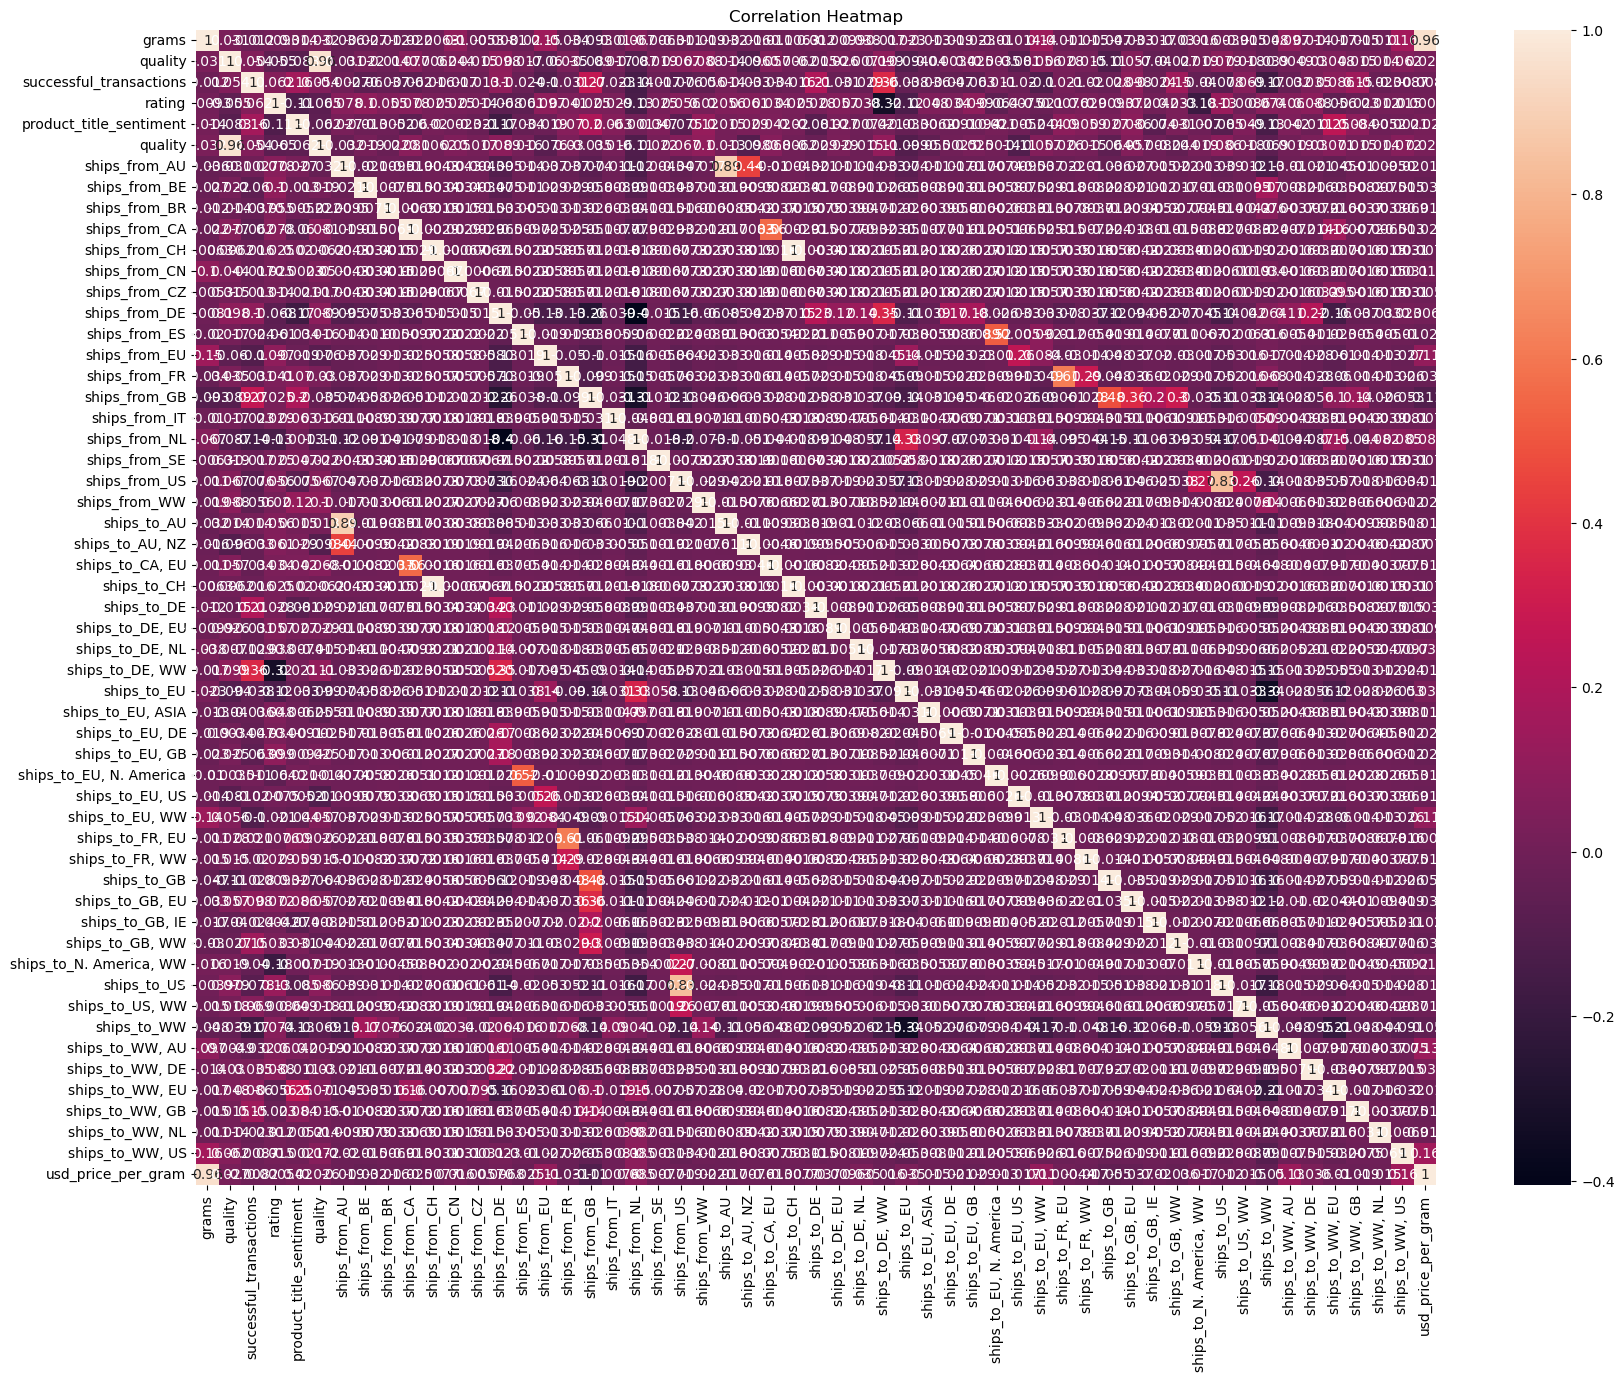

In [161]:
plt.figure(figsize=(20,15))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [162]:
abs(corrs.usd_price_per_gram).sort_values(ascending=False)

usd_price_per_gram         1.000000
grams                      0.960451
ships_to_WW, US            0.159638
ships_to_WW, AU            0.134440
ships_from_EU              0.114594
ships_to_EU, WW            0.112681
ships_from_GB              0.106964
ships_from_NL              0.084818
ships_to_GB                0.055074
ships_to_WW                0.050374
ships_to_GB, EU            0.037344
ships_to_GB, WW            0.035690
ships_to_WW, DE            0.035648
ships_to_DE, NL            0.035480
ships_to_EU                0.035111
ships_from_BE              0.032190
ships_from_FR              0.031008
ships_to_EU, GB            0.028511
quality                    0.027096
quality                    0.026077
ships_from_ES              0.025183
ships_from_CA              0.024955
ships_from_WW              0.022113
ships_to_EU, DE            0.020700
ships_to_GB, IE            0.020337
product_title_sentiment    0.020016
ships_to_WW, GB            0.019214
ships_from_US              0

In [163]:
abs(corrs.usd_price_per_gram).sort_values(ascending=False)

usd_price_per_gram         1.000000
grams                      0.960451
ships_to_WW, US            0.159638
ships_to_WW, AU            0.134440
ships_from_EU              0.114594
ships_to_EU, WW            0.112681
ships_from_GB              0.106964
ships_from_NL              0.084818
ships_to_GB                0.055074
ships_to_WW                0.050374
ships_to_GB, EU            0.037344
ships_to_GB, WW            0.035690
ships_to_WW, DE            0.035648
ships_to_DE, NL            0.035480
ships_to_EU                0.035111
ships_from_BE              0.032190
ships_from_FR              0.031008
ships_to_EU, GB            0.028511
quality                    0.027096
quality                    0.026077
ships_from_ES              0.025183
ships_from_CA              0.024955
ships_from_WW              0.022113
ships_to_EU, DE            0.020700
ships_to_GB, IE            0.020337
product_title_sentiment    0.020016
ships_to_WW, GB            0.019214
ships_from_US              0

In [164]:
# Step 1: Get the Data
#X = df2.drop(columns=["quality"])
#y = df2.quality

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#print(X.shape)
#print(X_train.shape)
#print(X_test.shape)


In [165]:
# Step 1: Get the Data
X = df2.drop(columns=["usd_price_per_gram"])
y = df2.usd_price_per_gram

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1504, 9)
(1128, 9)
(376, 9)


In [166]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

In [167]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [168]:
# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

ValueError: Found unknown categories [67.0] in column 0 during transform

In [169]:
# Step 2: Init the Model
en = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

In [170]:
# Do Machine Learning
doRegression(en, X_train, X_test, y_train, y_test)

ValueError: Found unknown categories [67.0] in column 0 during transform

In [171]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [172]:
# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)

ValueError: Found unknown categories [67.0] in column 0 during transform

In [173]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

ModuleNotFoundError: No module named 'xgboost'

In [174]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Do Machine Learning
doRegression(xgb, X_train, X_test, y_train, y_test)

NameError: name 'XGBRegressor' is not defined

In [175]:
# Step 2: Init the Model
lgb  = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42, verbose=-1))
])

# Do Machine Learning
doRegression(lgb , X_train, X_test, y_train, y_test)

NameError: name 'LGBMRegressor' is not defined

In [176]:
# XGBOOST Feature Importance

fi = pd.DataFrame(list(zip(X.columns, xgb.named_steps['regressor'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

NameError: name 'xgb' is not defined

In [177]:
df2.groupby("ships_from").usd_price_per_gram.mean().sort_values(ascending=False)

ships_from
AU    9095.123500
CH    4647.143394
SE    4162.562085
IT    3146.097157
GB    3098.902363
FR    3088.421774
CZ    2885.029542
US    2803.545567
BE    2732.849375
CA    2566.189246
ES    2504.766091
DE    2467.261301
WW    2277.930110
NL    2153.262397
EU    1948.772478
BR    1320.894364
CN     289.366736
Name: usd_price_per_gram, dtype: float64

In [178]:
df.vendor_name.value_counts().head(10) # could be feature

vendor_name
thebestchemist    25
amsterdam2015     24
sky-high          23
MedicsNL          23
Naturalminds      23
AMSTERDAM_INC     22
CocaColaFR        21
Gofastteam        21
pablopablito      21
Mister-Molly      20
Name: count, dtype: int64